# Multi Objective Optimization

In [1]:
from wpaf_opt import *
import time

start_time = time.time()

x, moo_res_best, p_best, op_obj = wpaf_multi_opt()

print('Execution time:', time.time() - start_time, 'seconds')

Execution time: 7210.855387210846 seconds


In [2]:
#print("Non Dominant Objective Functions=\n", moo_res_best.F)
#print("Non Dominant Design Variables=\n", moo_res_best.X)

# Pareto Front

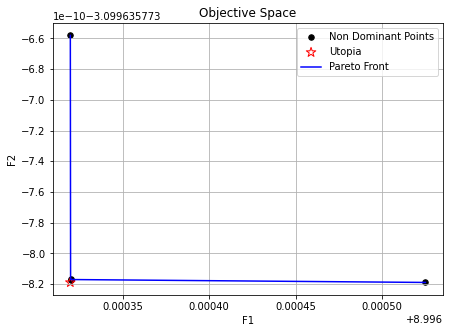

In [3]:
import matplotlib.pyplot as plt

approx_ideal = moo_res_best.F.min(axis=0)
approx_nadir = moo_res_best.F.max(axis=0)

plt.figure(figsize=(7, 5))
plt.scatter(moo_res_best.F[:, 0], moo_res_best.F[:, 1], s=30, facecolors='black', edgecolors='black', label="Non Dominant Points")
plt.scatter(approx_ideal[0], approx_ideal[1], facecolors='none', edgecolors='red', marker="*", s=100, label="Utopia")
plt.plot(np.sort(moo_res_best.F[:,0]), np.sort(moo_res_best.F[:, 1])[::-1], color='blue', label="Pareto Front")
#plt.scatter(approx_nadir[0], approx_nadir[1], facecolors='none', edgecolors='black', marker="p", s=100, label="Nadir Point (Approx)")
plt.title("Objective Space")
plt.xlabel('F1')
plt.ylabel('F2')
plt.legend()
plt.grid()
plt.show()

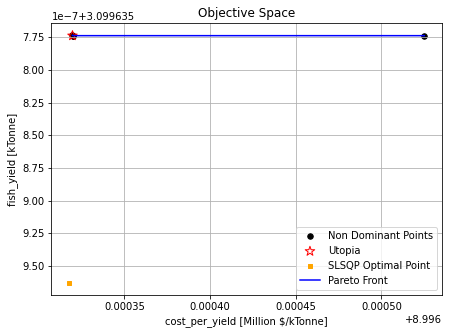

In [4]:
# coefficients are defined based on minimization (1) and maximization (-1).
f1_coeff = 1
f2_coeff = -1

f1 = f1_coeff * moo_res_best.F[:, 0]
f2 = f2_coeff * moo_res_best.F[:, 1]
approx_ideal_tick = [min(f1), max(f2)] #min of objective
approx_nadir_tick = [max(f1), min(f2)] #max of objective


x_init, p_init, x, soo_res_best, p_best, op_obj = wpaf_single_opt()
wpaf_opt_obj = WPAF(soo_res_best.x, x.name, p_best) 

plt.figure(figsize=(7, 5))
plt.scatter(f1, f2, s=30, facecolors='black', edgecolors='black', label="Non Dominant Points")
plt.scatter(approx_ideal_tick[0], approx_ideal_tick[1], facecolors='none', edgecolors='red', marker="*", s=100, label="Utopia")
#plt.scatter(approx_nadir_tick[0], approx_nadir_tick[1], facecolors='none', edgecolors='black', marker="p", s=100, label="Nadir Point (Approx)")
plt.scatter(f1_coeff * wpaf_opt_obj.multi_obj_func[0], f2_coeff * wpaf_opt_obj.multi_obj_func[1], facecolors='orange', edgecolors='orange', marker="s", s=10, label="SLSQP Optimal Point")
plt.plot(np.sort(f1), np.sort(f2), color='blue', label="Pareto Front")
plt.title("Objective Space")
plt.xlabel('cost_per_yield [Million $/kTonne]')
plt.ylabel('fish_yield [kTonne]')
plt.gca().invert_yaxis()
plt.legend()
plt.grid()
plt.show()